# Supervised Learning Algorithm 

# 1. Importing the libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# 2. Load the dataset

In [37]:
def load_cmapss_data(filename):
    # CMAPSS FD001 has 26 columns -> unit_nr, time_cycles + 21 sensors + 3 settings
    col_names = ['unit_nr', 'time_cycles'] + [f'operational_setting_{i}' for i in range(1,4)] + [f'sensor_{i}' for i in range(1,22)]
    df = pd.read_csv(filename, sep=" ", header=None)
    df = df.dropna(axis=1, how='all')   # remove empty columns
    df.columns = col_names
    return df

df = load_cmapss_data("/Users/rohanpatil/Desktop/ai_ml_projects/project_1/data/CMAPSSData/train_FD001.txt")
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (20631, 26)


,unit_nr,time_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [9]:
df.columns

Index(['unit_nr', 'time_cycles', 'operational_setting_1',
       'operational_setting_2', 'operational_setting_3', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7',
       'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_nr                20631 non-null  int64  
 1   time_cycles            20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   operational_setting_2  20631 non-null  float64
 4   operational_setting_3  20631 non-null  float64
 5   sensor_1               20631 non-null  float64
 6   sensor_2               20631 non-null  float64
 7   sensor_3               20631 non-null  float64
 8   sensor_4               20631 non-null  float64
 9   sensor_5               20631 non-null  float64
 10  sensor_6               20631 non-null  float64
 11  sensor_7               20631 non-null  float64
 12  sensor_8               20631 non-null  float64
 13  sensor_9               20631 non-null  float64
 14  sensor_10              20631 non-null  float64
 15  se

In [11]:
df.describe()

,unit_nr,time_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


## 2.1 Data Analysis

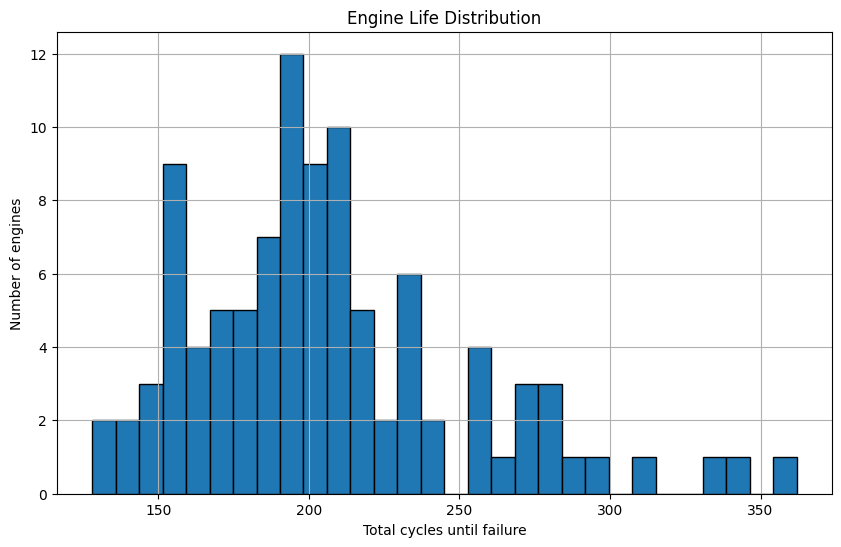

In [12]:
# 1. Distribution of operating cycles per engine
plt.figure(figsize=(10,6))
df.groupby('unit_nr')['time_cycles'].max().hist(bins=30, edgecolor="black")
plt.xlabel("Total cycles until failure")
plt.ylabel("Number of engines")
plt.title("Engine Life Distribution")
plt.show()

<Axes: title={'center': 'Sensor 2 Distribution'}, ylabel='Frequency'>

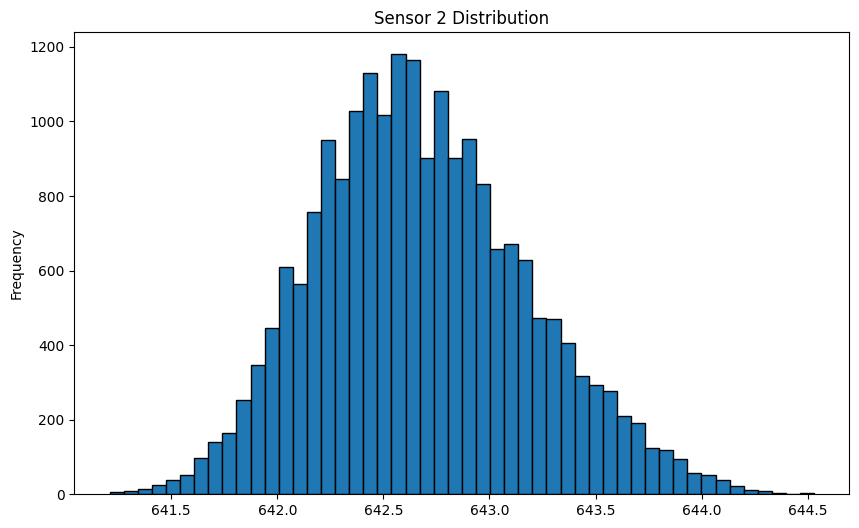

In [46]:
df['sensor_2'].plot(kind='hist', bins=50, title='Sensor 2 Distribution', edgecolor='black', figsize=(10,6))

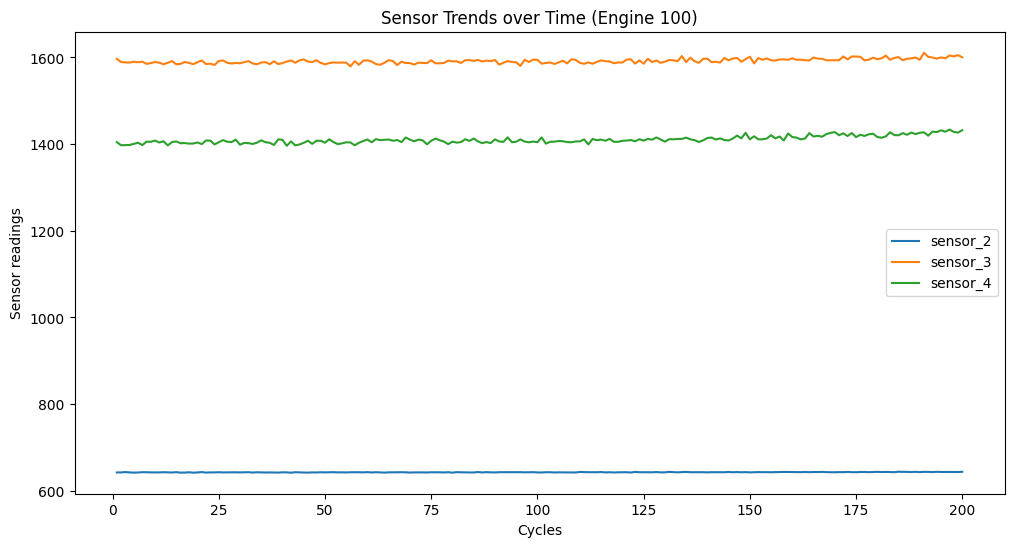

In [42]:

# 2. Line plot of sensor signals over time (for a single engine)
engine_id = 100
engine_data = df[df['unit_nr'] == engine_id]

plt.figure(figsize=(12,6))
for sensor in ['sensor_2', 'sensor_3', 'sensor_4']:
    plt.plot(engine_data['time_cycles'], engine_data[sensor], label=sensor)
plt.xlabel("Cycles")
plt.ylabel("Sensor readings")
plt.title(f"Sensor Trends over Time (Engine {engine_id})")
plt.legend()
plt.show()


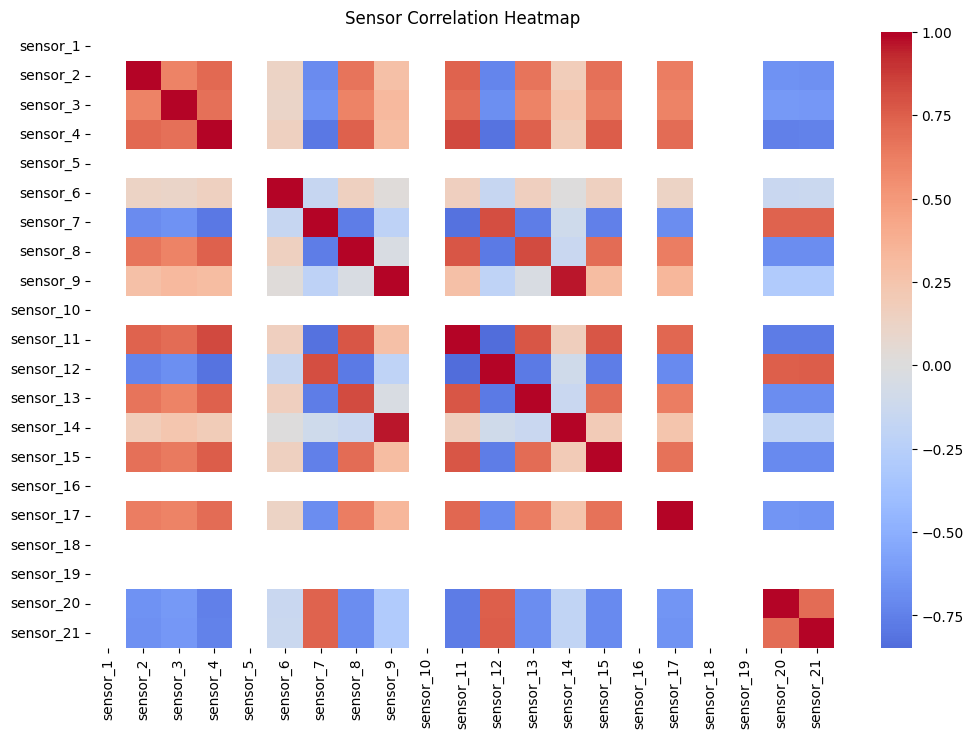

In [14]:
# 3. Correlation heatmap of sensors
plt.figure(figsize=(12,8))
sns.heatmap(df[[f'sensor_{i}' for i in range(1,22)]].corr(), cmap="coolwarm", center=0)
plt.title("Sensor Correlation Heatmap")
plt.show()

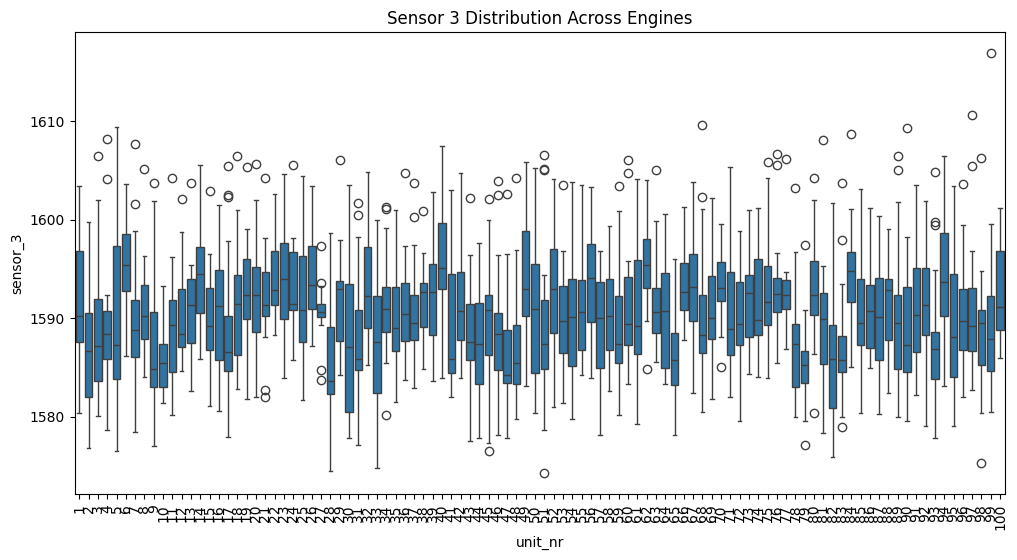

In [48]:
# 4. Boxplot of a sensor across multiple engines
plt.figure(figsize=(12,6))
sns.boxplot(x="unit_nr", y="sensor_3", data=df.sample(2000))  # sampling to reduce clutter
plt.xticks(rotation=90)
plt.title("Sensor 3 Distribution Across Engines")
plt.show()


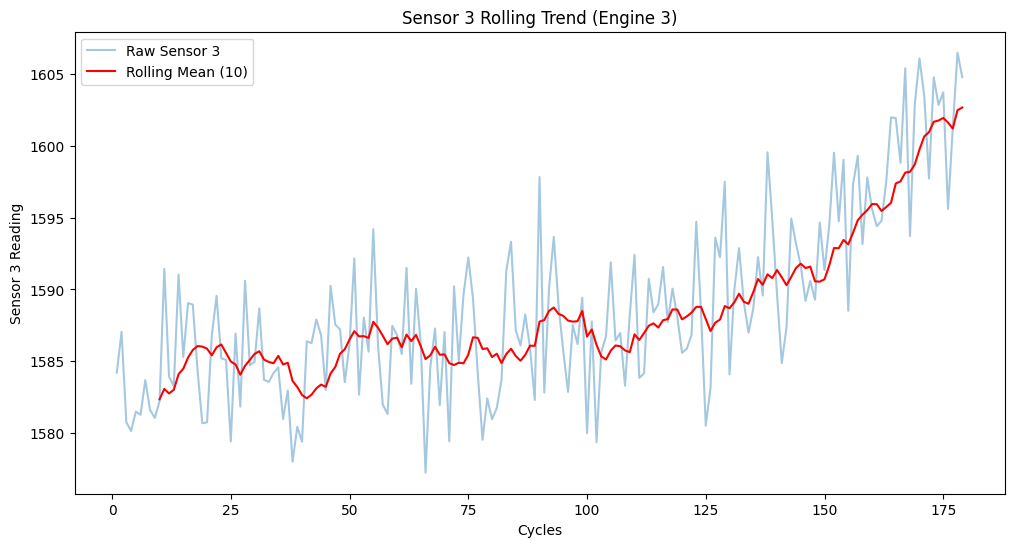

In [52]:
# 5. Rolling mean trend (degradation visualization)
engine_id = 3
engine_data = df[df['unit_nr'] == engine_id].copy()
engine_data['sensor_3_roll'] = engine_data['sensor_3'].rolling(window=10).mean()

plt.figure(figsize=(12,6))
plt.plot(engine_data['time_cycles'], engine_data['sensor_3'], alpha=0.4, label="Raw Sensor 3")
plt.plot(engine_data['time_cycles'], engine_data['sensor_3_roll'], color="red", label="Rolling Mean (10)")
plt.xlabel("Cycles")
plt.ylabel("Sensor 3 Reading")
plt.title(f"Sensor 3 Rolling Trend (Engine {engine_id})")
plt.legend()
plt.show()


# 3. Feature Engineering

In [53]:
# ==============================
# Step 3.1 : Add Rolling Features
# ==============================
def add_features(df):
    for col in [c for c in df.columns if 'sensor' in c]:
        df[col+"_rollmean"] = df[col].rolling(window=5, min_periods=1).mean()
        df[col+"_diff"] = df[col].diff().fillna(0)
    return df

In [54]:
df = add_features(df)

In [55]:
# ==============================
# Step 3.2: Calculate Remaining Useful Life (RUL)
# ==============================
def calculate_rul(df):
    rul_df = df.groupby('unit_nr')['time_cycles'].max().reset_index()
    rul_df.columns = ['unit_nr','max_cycles']
    df = df.merge(rul_df, on='unit_nr', how='left')
    df['RUL'] = df['max_cycles'] - df['time_cycles']
    return df,rul_df

df,rul_df = calculate_rul(df)

In [56]:
df

,unit_nr,time_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_18_rollmean,sensor_18_diff,sensor_19_rollmean,sensor_19_diff,sensor_20_rollmean,sensor_20_diff,sensor_21_rollmean,sensor_21_diff,max_cycles,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.0,0.0,100.0,0.0,39.060000,0.00,23.419000,0.0000,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.0,0.0,100.0,0.0,39.030000,-0.06,23.421300,0.0046,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.0,0.0,100.0,0.0,39.003333,-0.05,23.395600,-0.0794,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.0,0.0,100.0,0.0,38.972500,-0.07,23.390175,0.0297,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.0,0.0,100.0,0.0,38.958000,0.02,23.393020,0.0305,192,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.0,0.0,100.0,0.0,38.408000,0.35,23.079640,-0.2188,200,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.0,0.0,100.0,0.0,38.356000,-0.19,23.096120,0.1859,200,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.0,0.0,100.0,0.0,38.350000,0.14,23.078180,-0.2261,200,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.0,0.0,100.0,0.0,38.332000,-0.15,23.064500,0.1307,200,1


In [57]:
df.head()

,unit_nr,time_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_18_rollmean,sensor_18_diff,sensor_19_rollmean,sensor_19_diff,sensor_20_rollmean,sensor_20_diff,sensor_21_rollmean,sensor_21_diff,max_cycles,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.0,0.0,100.0,0.0,39.060000,0.00,23.419000,0.0000,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.0,0.0,100.0,0.0,39.030000,-0.06,23.421300,0.0046,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.0,0.0,100.0,0.0,39.003333,-0.05,23.395600,-0.0794,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.0,0.0,100.0,0.0,38.972500,-0.07,23.390175,0.0297,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.0,0.0,100.0,0.0,38.958000,0.02,23.393020,0.0305,192,187


In [58]:
# ==============================
# Step 3.3: Binary Classification Label (Failure Risk <= 30 cycles)
# ==============================
def add_labels(df, threshold=30):
    df['label'] = (df['RUL'] <= threshold).astype(int)
    return df

df = add_labels(df)
df[['unit_nr','time_cycles','RUL','label']].head(10)


,unit_nr,time_cycles,RUL,label
0,1,1,191,0
1,1,2,190,0
2,1,3,189,0
3,1,4,188,0
4,1,5,187,0
5,1,6,186,0
6,1,7,185,0
7,1,8,184,0
8,1,9,183,0
9,1,10,182,0


In [59]:
df.columns

Index(['unit_nr', 'time_cycles', 'operational_setting_1',
       'operational_setting_2', 'operational_setting_3', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7',
       'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_1_rollmean',
       'sensor_1_diff', 'sensor_2_rollmean', 'sensor_2_diff',
       'sensor_3_rollmean', 'sensor_3_diff', 'sensor_4_rollmean',
       'sensor_4_diff', 'sensor_5_rollmean', 'sensor_5_diff',
       'sensor_6_rollmean', 'sensor_6_diff', 'sensor_7_rollmean',
       'sensor_7_diff', 'sensor_8_rollmean', 'sensor_8_diff',
       'sensor_9_rollmean', 'sensor_9_diff', 'sensor_10_rollmean',
       'sensor_10_diff', 'sensor_11_rollmean', 'sensor_11_diff',
       'sensor_12_rollmean', 'sensor_12_diff', 'sensor_13_rollmean',
       'sensor_13_diff', 'sensor_14_rollmean', 'senso

In [60]:
df.head()

,unit_nr,time_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_18_diff,sensor_19_rollmean,sensor_19_diff,sensor_20_rollmean,sensor_20_diff,sensor_21_rollmean,sensor_21_diff,max_cycles,RUL,label
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.0,100.0,0.0,39.060000,0.00,23.419000,0.0000,192,191,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.0,100.0,0.0,39.030000,-0.06,23.421300,0.0046,192,190,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.0,100.0,0.0,39.003333,-0.05,23.395600,-0.0794,192,189,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.0,100.0,0.0,38.972500,-0.07,23.390175,0.0297,192,188,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.0,100.0,0.0,38.958000,0.02,23.393020,0.0305,192,187,0


/var/folders/h8/x2xfqyjs5cl005fb579670gw0000gn/T/ipykernel_45977/1523601204.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="Set2")


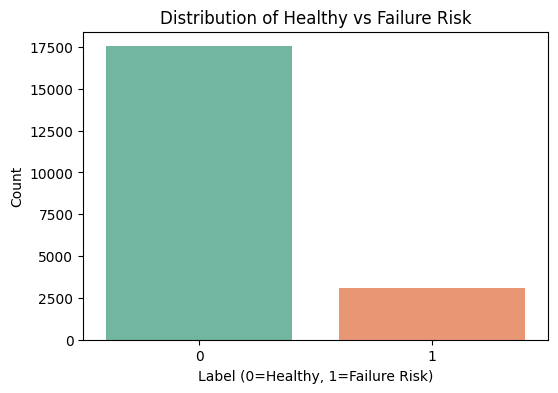

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Class balance (how many healthy vs failure-risk cycles)
plt.figure(figsize=(6,4))
sns.countplot(x="label", data=df, palette="Set2")
plt.title("Distribution of Healthy vs Failure Risk")
plt.xlabel("Label (0=Healthy, 1=Failure Risk)")
plt.ylabel("Count")
plt.show()

/var/folders/h8/x2xfqyjs5cl005fb579670gw0000gn/T/ipykernel_45977/3761761145.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="sensor_4_rollmean", data=df, palette="Set3")


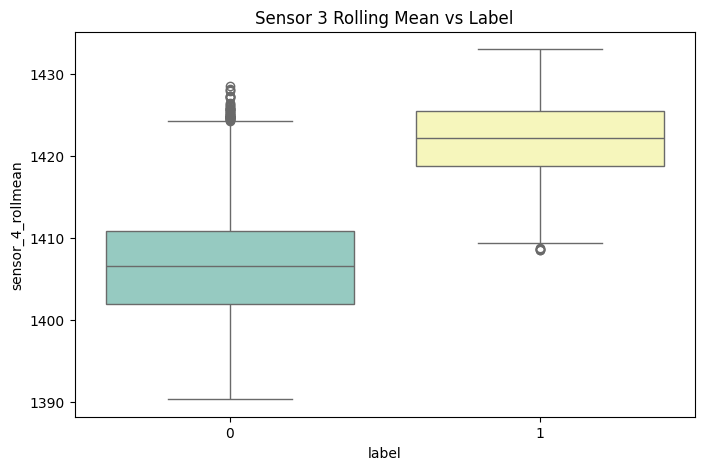

In [63]:
# 2. Boxplot of key sensor vs label
plt.figure(figsize=(8,5))
sns.boxplot(x="label", y="sensor_4_rollmean", data=df, palette="Set3")
plt.title("Sensor 3 Rolling Mean vs Label")
plt.show()

# 4. Model Building

In [65]:
df.shape

(20631, 71)

In [69]:
df.columns

Index(['unit_nr', 'time_cycles', 'operational_setting_1',
       'operational_setting_2', 'operational_setting_3', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7',
       'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_1_rollmean',
       'sensor_1_diff', 'sensor_2_rollmean', 'sensor_2_diff',
       'sensor_3_rollmean', 'sensor_3_diff', 'sensor_4_rollmean',
       'sensor_4_diff', 'sensor_5_rollmean', 'sensor_5_diff',
       'sensor_6_rollmean', 'sensor_6_diff', 'sensor_7_rollmean',
       'sensor_7_diff', 'sensor_8_rollmean', 'sensor_8_diff',
       'sensor_9_rollmean', 'sensor_9_diff', 'sensor_10_rollmean',
       'sensor_10_diff', 'sensor_11_rollmean', 'sensor_11_diff',
       'sensor_12_rollmean', 'sensor_12_diff', 'sensor_13_rollmean',
       'sensor_13_diff', 'sensor_14_rollmean', 'senso

In [70]:
features = [c for c in df.columns if 'sensor' in c]

In [ ]:
# ==============================
# Step 4.1: Train/Test Split
# ==============================


features = [c for c in df.columns if 'sensor' in c]
X = df[features]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [96]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 4.1 Baseline Model : Logistic Regression

In [112]:

# ==============================
# Logistic Regression
# ==============================
from sklearn.linear_model import LogisticRegression # Classification models

lr = LogisticRegression(max_iter=500)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5291
           1       0.84      0.86      0.85       899

    accuracy                           0.96      6190
   macro avg       0.91      0.92      0.91      6190
weighted avg       0.96      0.96      0.96      6190



## Evalution Metrics 

### 1. Regresssion - RMSE, R2, MSE & MAE

### 2. Classification - accuracy, precision , recall , f1-score

### 4.2 Random Forest classifier

In [115]:
# ==============================
# Random Forest
# ==============================
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)


preds_rf = rf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, preds_rf))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      5291
           1       0.86      0.83      0.85       899

    accuracy                           0.96      6190
   macro avg       0.92      0.91      0.91      6190
weighted avg       0.96      0.96      0.96      6190



### 4.3 Decision Tree Classifier

In [120]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

preds_dt = dt.predict(X_test)
print("Decision Tree Report:\n", classification_report(y_test, preds_dt))

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      5291
           1       0.79      0.84      0.82       899

    accuracy                           0.95      6190
   macro avg       0.88      0.90      0.89      6190
weighted avg       0.95      0.95      0.95      6190



### 4.3 Support Vector Machine 

In [121]:
from sklearn.svm import SVC

dt = SVC()
dt.fit(X_train, y_train)
preds_dt = dt.predict(X_test)
print("Decision Tree Report:\n", classification_report(y_test, preds_dt))

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      5291
           1       0.87      0.84      0.85       899

    accuracy                           0.96      6190
   macro avg       0.92      0.91      0.91      6190
weighted avg       0.96      0.96      0.96      6190

